# **DATA SCIENCE PROJECT: Hotel Booking Cancellations**

 **Curso Data Science - Coderhouse 2022-2023**

 **Autor: Evelyn Delacoste**

El dataset analizado contiene información sobre las reservas de un City Hotel y Resort Hotel entre las fechas Julio 2015 a Agosto 2017, localizado en Portugal.

Cada registro contiene datos sobre la solicitud realizada en la reserva y si efectivamente se concretó o fue cancelada.

Fuente: https://www.kaggle.com/datasets/mojtaba142/hotel-booking

# **Introducción**
**El lineamiento principal del proyecto es identificar cuáles son los condicionantes que influyen a que una reserva no se haga efectiva.** **El análisis es útil para impulsar estrategias de negocios que mejoren el rendimiento del Hotel.**

Los registros diponibles contienen reservas de dos tipos de hotel de la misma cadena:
* Hotel Resort: Es un hotel que provee instalaciones variadas apuntadas al entretenimiento, un estilo de hotel all-inclusive.
* City Hotel: es un hotel clásico con alojamiento y bufet para comidas como desayuno o cena.

El registro de las reservas es por un período de tiempo de aproximadamente 2 años (jul2015-Ago2017)

Previo a analizar los datos disponibles, surgen los siguientes cuestionamientos:

* ¿Cuál es el hotel más demandado?
* ¿Cuál es la duración de la estadia promedio?
* ¿Qué características poseen los clientes de cada hotel? ¿Nacionalidad, Edades, Sexo? ¿Cómo se clasifican los grupos de clientes?
* ¿Cuál es la época del año más solicitada? ¿Existe un comportamiento diferente según el tipo de hotel?
* ¿Varia la tarifa según la demanda? ¿Y según los días de la semana?
* ¿Qué mes del año posee mayor número de cancelaciones? ¿Que duración poseen las estadias que se cancelan?

**Primero se verificará que clase de información hay disponible en el dataset para luego plantear las preguntas de negocio, las cuales serán la guía del proyecto.**

## **Contexto Analítico: Insights Intro**
Esta sección apunta a obtener una previsualización de la información disponible.

In [1]:
# importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

In [2]:
# direccion de la ubicación de la base de datos
url = "https://raw.githubusercontent.com/EvDelacost/Hotel-Bookings-Classification/79a9a06d792e1b8c1a49122931090162a38041ec/hotel_booking.csv"

In [3]:
# lectura del dataset
df = pd.read_csv(url)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:
# cantidad de filas y columnas
df.shape

(119390, 36)

In [7]:
# tipos de datos en cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# verificación de la cantidad de nulos
df.isna().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

In [9]:
# porcentaje de nulos en cada variable
(df.isna().sum().sort_values(ascending = False) / df.shape[0]) * 100

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
hotel                              0.000000
booking_changes                    0.000000
deposit_type                       0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
reserved_room_type                 0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
reservation_status_date            0.000000
name                               0.000000
email                              0.000000
phone-number                       0.000000
assigned_room_type                 0.000000
previous_bookings_not_canceled     0.000000
is_canceled                        0.000000
previous_cancellations             0.000000
is_repeated_guest               

**El dataset posee 119390 registros con 35 variables diferentes.**
**Existen variables con tipos de datos numéricos, de texto y fechas que se encuentran en formato numérico.**

**Hay 4 variables con valores nulos pero, exceptuando una de ellas, tienen un porcentaje muy bajo**.

In [10]:
# variables numéricas
num_col=[column for column in df.columns if (df[column].dtype=='int64') | (df[column].dtype=='float64')]
num_col

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [11]:
# variables categóricas
cat_col=[column for column in df.columns if (df[column].dtype=='object')]
cat_col

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

**A continuación se describe el contenido de las variables clasificandolas en categóricas y numéricas**

**VARIABLES CATEGORICAS**
*   hotel: Indica si se trata de un Resort Hotel o City Hotel.
*   arrival_date_month: Indica el mes de arribo del cliente entre January - December.
*   meal: Indica el tipo de comida incluida en la reserva.
*   country: Indica el pais de origen del cliente.
*   market_segment: Indica la designación del segmento de mercado. En las categorías, el término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos".
*   distribution_channel: Indica canal de distribución de reservas. El término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos".
*   reserved_room_type: Indica mediante una codificación el tipo de habitación asignada en la reserva.
*   assigned_room_type: Indica mediante una codificación el tipo de habitación asignada en el arribo del cliente.
*   deposit_type: Indica el tipo de forma de pago.
*   customer_type: Indica el tipo de cliente Grupo – cuando la reserva está asociada a un grupo; Transitorio – cuando la reserva no es parte de un grupo o contrato, y no está asociada a otros.
*   reservation_status: Indica el estado de la reserva.
*   reservation_status_date: Indica Indica la fecha de actualización del estado de la reserva.
*   name: Nombre del cliente.
*   email: Dirección de correo del cliente.


**VARIABLES NUMÉRICAS**
*   is_cancelled: Indica con 1 reserva cancelada y con 0 reserva no cancelada.
*   lead_time: Indica el plazo de tiempo entre la ejecución de la reserva y el arribo del cliente al hotel.
*   arrival_date_year: Indica el año de arribo del cliente.
*   arrival_date_week_number: Indica el número de la semana dentro del mes de arribo del cliente.
*   stays_in_weekend_nights: Indica la cantidad de noches de fin de semana (saturday-sunday) que se hospedo el cliente.
*   stays_in_week_nights: Esta variable indica la cantidad de noches de semana (monday-friday) que se hospedo el cliente.
*   adults: Indica la cantidad de adultos por reserva.
*   children: Indica la cantidad de niños por reserva.
*   babies: Indica la cantidad de bebés por reserva.
*   is_repeated_guest: Indica con 1 si el cliente ya se hospedó en el hotel y con 0 si es nuevo cliente.
*   previous_cancellatios: Indica número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.
*   previous_bookings_not_canceled: Indica número de reservas anteriores no canceladas por el cliente antes de la reserva actual.
*   booking_changes: Indica el número de cambios/modificaciones realizados en la reserva desde el momento en que se ingresó la reserva hasta el arribo del cliente.
*   agent: Indica el ID del agente de viajes que agendó la reserva.
*   company: Indica el ID de la compañía que agendó la reserva.
*   days_in_waiting_list: Indica el número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente.
*   adr: Indica el valor promedio de la tarifa.
*   required_car_parking_spaces: Indica el número de plazas de aparcamiento requeridas por el cliente.
*   total_of_special_requests: Indica el número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto).
*   phone-number: Número de telefono del cliente.
*   credit_card: Número de la tarjeta de crédito del cliente.

## **Preguntas de Negocio**
A partir de la definición de las variables, se plantean algunas cuestiones que formarán parte del **problema de negocio: RESERVAS CANCELADAS**.


1.   ¿Cual es el hotel más demandado y cuál de ellos posee mayor % de cancelaciones?
2.   ¿Cuáles son las épocas del año más demandas? ¿Qué sucede con las estadías?
3.   ¿Como se comporta el cliente con respecto al tiempo previo de arribo al hotel? ¿Tiene que ver con la Nacionalidad o Composición Familiar?
4.   ¿El Hotel tiene clientela fija? ¿Como se comportan aquellos clientes frecuentes?
5.   ¿Como gestiona el hotel las reservas?
6.   ¿Como son las tarifas de los hoteles?

# **Data Wrangling**
Esta sección apunta a realizar algunas tareas de limpieza de datos en base a lo detectado en el apartado Contexto Analítico.

##**Verificación de datos en variables**

In [13]:
#La variable "Hotel" no deberia contener más que 2 variables:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [14]:
#La variable "is_canceled" no deberia contener más que ceros y unos:
df["is_canceled"].unique()

array([0, 1])

In [15]:
#La variable "arrival_date_year" debería contener los años 2015,2016 y 2017 según la fuente de descarga del dataset:
df["arrival_date_year"].unique()

array([2015, 2016, 2017])

In [16]:
#La variable "arrival_date_month" debería contener los 12 años del mes:
df["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [17]:
#La suma de las estadías en la semana y en el fin de semana no debería ser cero
df.drop(df[df["stays_in_weekend_nights"] + df["stays_in_week_nights"]==0].index,inplace=True)

In [18]:
#se eliminaron 715 filas con estadías nulas
df.shape

(118675, 36)

In [19]:
#La suma de la cantidad de personas en la reserva no debería ser cero
df.drop(df[df["adults"] + df["children"]+df["babies"]==0].index,inplace=True)

In [20]:
#se eliminaron 110 filas con huespedes nulos
df.shape

(118565, 36)

## **Registros Duplicados & Valores Nulos**

In [21]:
#se verifica si hay registros duplicados
df.duplicated().value_counts()

False    118565
dtype: int64

In [22]:
#analisis de las variables con valores nulos
df.isna().sum().sort_values(ascending=False)

company                           111870
agent                              16079
country                              473
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

**Se identifican 4 variables con valores nulos:**
* company
* agent
* children
* country

**A continuación se analiza el contenido de cada una de ellas.**

**Variable company**

In [23]:
df["company"].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 274., 174., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371.,  86.,  82., 218.,
        88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,  51.,
       395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478., 112.,
       486., 421.,   9., 308., 135., 224., 504., 269., 356., 498., 390.,
       513., 203., 263., 477., 521., 169., 515., 445., 337., 251., 428.,
       292., 388., 130., 250., 355., 254., 543., 531., 528.,  62., 120.,
        42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61., 501., 165.,
       291., 290.,  43., 325., 192., 108., 200., 465., 287., 297., 490.,
       482., 207., 282., 437., 225., 329., 272.,  28.,  77., 338.,  72.,
       246., 319., 146., 159., 380., 323., 511., 407., 278.,  80., 403.,
       399.,  14., 137., 343., 346., 347., 349., 289., 351., 353.,  54.,
        99., 358., 361., 362., 366., 372., 365., 27

In [24]:
df["company"].value_counts(normalize=True)

40.0     0.137267
223.0    0.115459
67.0     0.039881
45.0     0.036146
153.0    0.031217
           ...   
184.0    0.000149
142.0    0.000149
32.0     0.000149
11.0     0.000149
237.0    0.000149
Name: company, Length: 347, dtype: float64

**En base a que el % de nulos de la variable "company" es alto (94 %), se decide eliminar el mismo.**

In [25]:
df = df.drop("company",axis=1)

**Variable agent**

In [26]:
df["agent"].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [27]:
df["agent"].value_counts(ascending=False)

9.0      31855
240.0    13795
1.0       7185
14.0      3620
7.0       3519
         ...  
93.0         1
54.0         1
497.0        1
337.0        1
59.0         1
Name: agent, Length: 333, dtype: int64

In [28]:
df["agent"].describe()

count    102486.000000
mean         86.517641
std         110.715507
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

**Se completan los nulos de la variable "agent" con el valor: "NI", que indicará que no fue informado.**

In [29]:
df["agent"].fillna("NI" ,inplace=True)

**Variable children**

In [30]:
df["children"].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

**Se completarán con 0 los valores nulos de la variable children.**

In [31]:
df["children"].fillna(0 ,inplace=True)

**Variable country**

In [32]:
df["country"].unique()

array(['GBR', 'PRT', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA',
       'ETH', 'I

**Se completarán con "Otros" los valores nulos de la variable "country".**

In [33]:
df["country"].fillna("Otros" ,inplace=True)

In [34]:
df.isna().sum().sort_values(ascending=False)

hotel                             0
adr                               0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
previous_bookings_not_canceled    0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
name                              0
email                             0
phone-number                      0
reserved_room_type                0
previous_cancellations            0
is_canceled                       0
stays_in_week_nights              0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
adults                            0
is_repeated_guest           

## **Eliminación de variables**
Se eliminan variables de datos personales ya que se consideran irrelevantes

In [35]:
df = df.drop("name",axis=1)

In [36]:
df = df.drop("phone-number",axis=1)

In [37]:
df = df.drop("credit_card",axis=1)

In [38]:
df = df.drop("email",axis=1)

In [39]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NI,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,NI,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [40]:
df.shape

(118565, 31)

## **Análisis de Outliers**
A partir de la definición de las variables, se verificará la existencia de outliers en las siguientes variables continuas:

1. Lead Time
2. Days in waiting list
3. ADR


Text(0.5, 1.0, 'Box-Plot Variable lead_time')

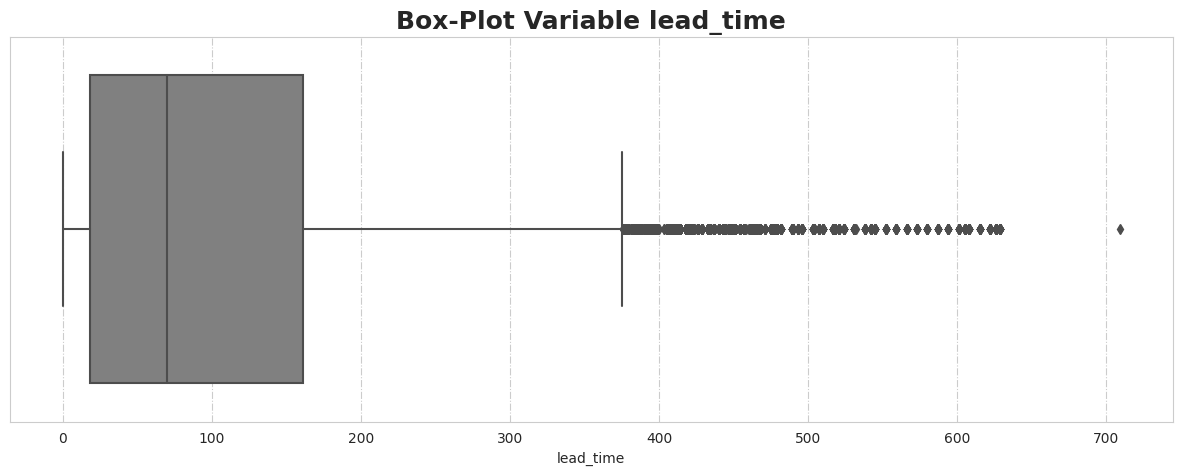

In [41]:
# gráfico boxplot de la variable "lead_time"
plt.subplots(figsize = (15,5))

sns.boxplot(data=df, x="lead_time",color="Grey")

plt.title("Box-Plot Variable lead_time",fontweight = "bold", fontsize = 18)

In [42]:
# valores estadísticos de la variable lead_time
df.lead_time.describe()

count    118565.000000
mean        104.505832
std         106.915519
min           0.000000
25%          18.000000
50%          70.000000
75%         161.000000
max         709.000000
Name: lead_time, dtype: float64

In [43]:
# cantidad de valores atípicos
df[df["lead_time"] > 380].shape[0]

2798

In [44]:
# % porcentaje de valores atípicos
df[df["lead_time"] > 380].shape[0]/df.shape[0]

0.02359886981824316

Text(0.5, 1.0, 'Box-Plot Variable days_in_waiting_list')

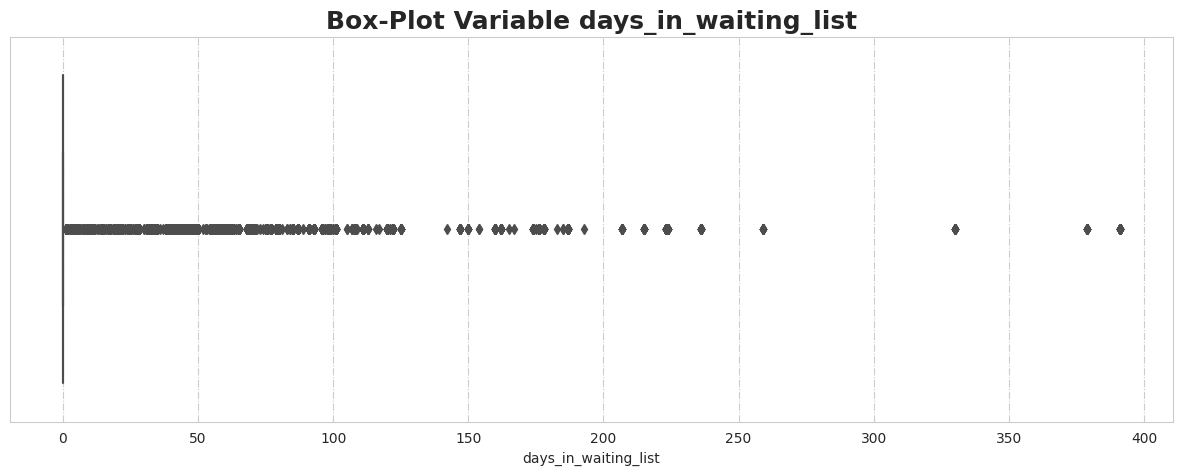

In [45]:
# gráfico bosplot de la variable "days_in_waiting_list"
plt.subplots(figsize = (15,5))

sns.boxplot(data=df, x="days_in_waiting_list",color="Grey")

plt.title("Box-Plot Variable days_in_waiting_list",fontweight = "bold", fontsize = 18)

In [46]:
# valores estadísticos de la variable days_in_waiting_list
df.days_in_waiting_list.describe()

count    118565.000000
mean          2.333016
std          17.642783
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

In [47]:
# % de valores de la variable days_in_waiting_list
df.days_in_waiting_list.value_counts(normalize=True)

0      0.968861
39     0.001915
58     0.001383
44     0.001189
31     0.001071
         ...   
175    0.000008
116    0.000008
142    0.000008
193    0.000008
36     0.000008
Name: days_in_waiting_list, Length: 127, dtype: float64

Text(0.5, 1.0, 'Box-Plot Variable ADR')

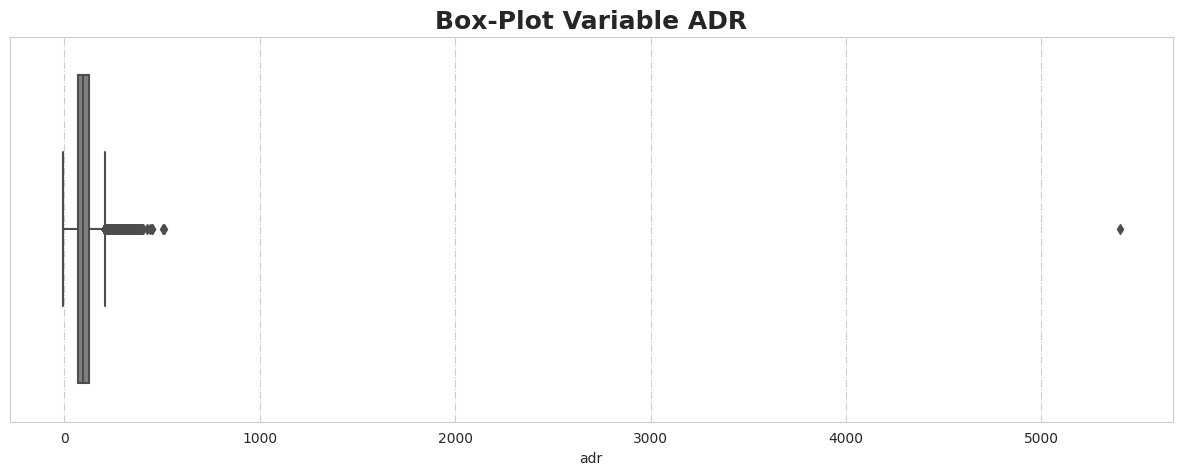

In [48]:
# gráfico bosplot de la variable "adr"
plt.subplots(figsize = (15,5))

sns.boxplot(data=df, x="adr",color="Grey")

plt.title("Box-Plot Variable ADR",fontweight = "bold", fontsize = 18)

In [49]:
# valores estadísticos de la variable adr
df.adr.describe()

count    118565.000000
mean        102.523809
std          50.005542
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [50]:
# calculo del límite superior
Q1=np.percentile(df["adr"],25)
Q3=np.percentile(df["adr"],75)
IQR = Q3-Q1
outlier_step = IQR*1.5
outlier_sup = Q3+outlier_step

In [51]:
# límite superior
outlier_sup

210.0

In [52]:
# cantidad de valores atípicos
df[df["adr"] > outlier_sup].shape[0]

3891

In [53]:
# % porcentaje de valores atípicos
df[df["adr"] > 189].shape[0]/df.shape[0]

0.05578374731160123

**Conclusiones sobre valores atípicos:**

1. La variable lead_time posee el 2% de sus valores que se considerarían como outliers; es un % muy bajo y quizás estos valores puedan aportan información al análisis por lo que no se realizan acciones sobre la variable.

2. La variable days_in_waiting_list posee el 96 % de sus valores en 0; el % restante varia ampliamente hasta los 400 días. Al igual que la variable anterior, se decide no realizar acciones ya que estos valores "fuera de la norma" podrían aportar valor al análisis.

3. En cuando a la variable ADR, si se detectaron algunos valores muy alejados y algunos valores negativos. Se dispone un rango entre 1 y 189 usd y se anulan los valores por fuera de ellos.


In [54]:
df.drop(df[df["adr"] < 1].index,inplace=True)

In [55]:
df.drop(df[df["adr"] > outlier_sup].index,inplace=True)

In [56]:
df.shape[0]

113506

Text(0.5, 1.0, 'Box-Plot Variable ADR sin outliers')

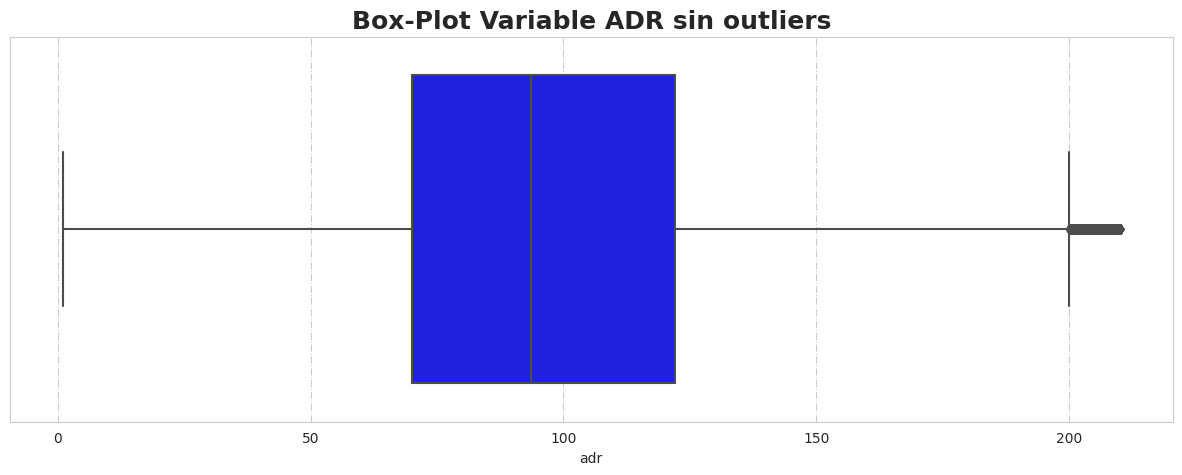

In [57]:
plt.subplots(figsize = (15,5))
sns.boxplot(data=df, x="adr",color="Blue")
plt.title("Box-Plot Variable ADR sin outliers",fontweight = "bold", fontsize = 18)

# **EDA: Análisis Exploratorio de Datos**
En esta sección se resumen las conclusiones más importantes del EDA, guiado a partir de las preguntas de negocio indicadas en la sección previa.

El 60 % de los datos disponibles corresponden a reservas realizadas en el City Hotel, en promedio el 60-70 % de las reservas son efectivas.

El comportamiento de las cancelaciones no presentó un patron diferente a partir del tipo de hotel, es decir, sigue siendo un porcentaje proporcional a la cantidad de reservas en cada hotel.

[Text(0, 0, 'efectiva'), Text(1, 0, 'cancelada')]

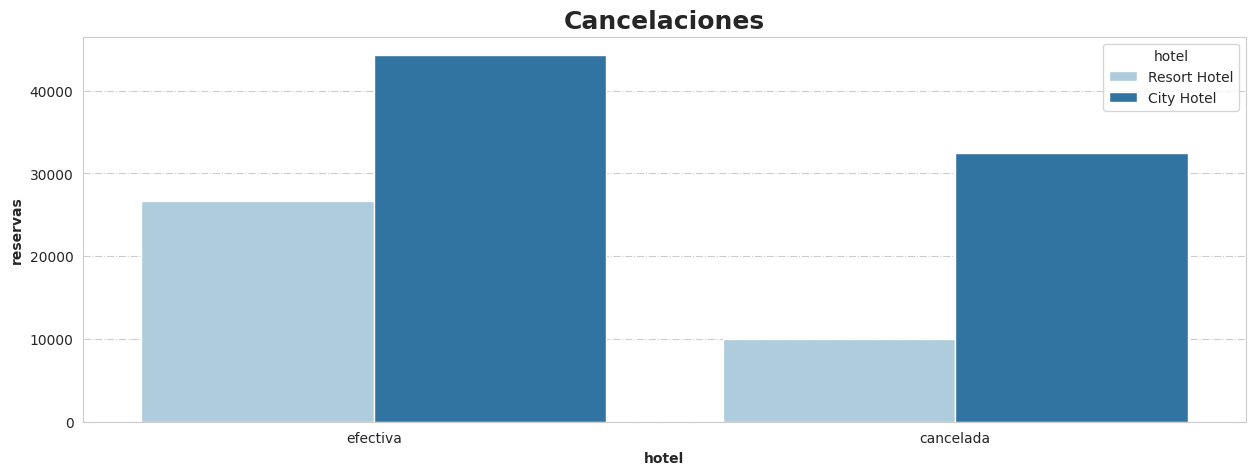

In [58]:
plt.subplots(figsize = (15,5))
a=sns.countplot (data=df, x="is_canceled", hue="hotel",palette = sns.color_palette("Paired", 3))
plt.title("Cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("hotel",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)
a.set_xticklabels(["efectiva","cancelada"])

El mes de mayor demanda de reservas es Agosto, mientras que el de menor demanda es Enero.

No tiene mucho valor analítico el año de la reserva ya que solo existen registros completos del año 2016.

En cuanto a los meses del año, el comportamiento de las cancelaciones sigue siendo el esperado según los datos generales.

In [59]:
# orden de los meses del año en la variable
df=df.replace({"arrival_date_month":{"January":1,"February":2,"March":3,"April":4,"May":5,
                                  "June":6,"July":7,"August":8,"September":9,"October":10,
                                  "November":11,"December":12}})

Text(0, 0.5, 'reservas')

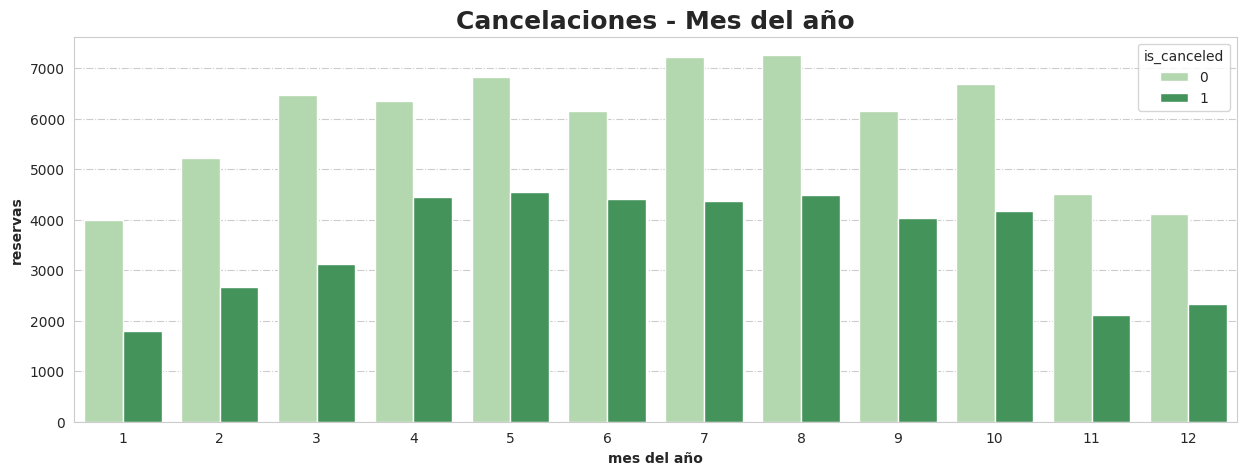

In [60]:
plt.subplots(figsize = (15,5))
sns.countplot (data=df, x= "arrival_date_month", hue="is_canceled", palette = sns.color_palette("Greens", 2))
plt.title("Cancelaciones - Mes del año",fontweight = "bold", fontsize = 18)
plt.xlabel("mes del año",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

La estadía promedio en ambos hoteles es de 3 días, pero en el City Hotel la estadía es menor que en el Resort Hotel.

En cuanto a la duración de las estadías en referencia a los meses del año, también se identifican variaciones según el tipo de hotel:

* City Hotel: El mes de estadías más largas es Diciembre y el de estadías más cortas es Octubre, mostrando un comportamiento uniforme a lo largo del año.

* Resort Hotel: El mes de estadías más largas es Junio y el de estadías más cortas es Enero, mostrando un comportamiento muy variante a lo largo del año.


In [61]:
df["stays"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]

Text(0, 0.5, 'reservas')

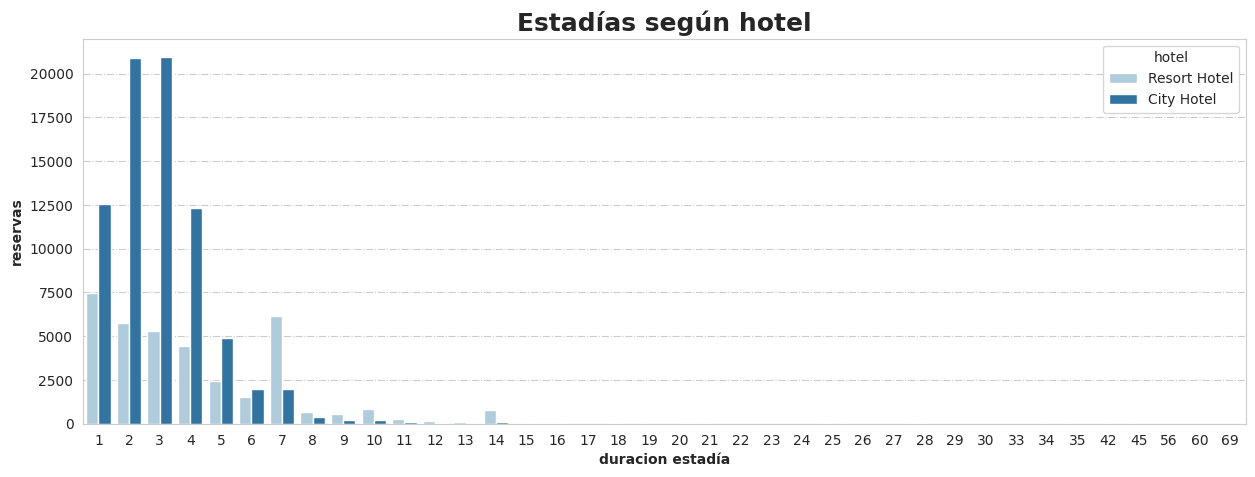

In [62]:
plt.subplots(figsize = (15,5))
sns.countplot(x="stays", data=df, hue="hotel", palette = sns.color_palette("Paired", 2))
plt.title("Estadías según hotel",fontweight = "bold", fontsize = 18)
plt.xlabel("duracion estadía",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'duracion estadías')

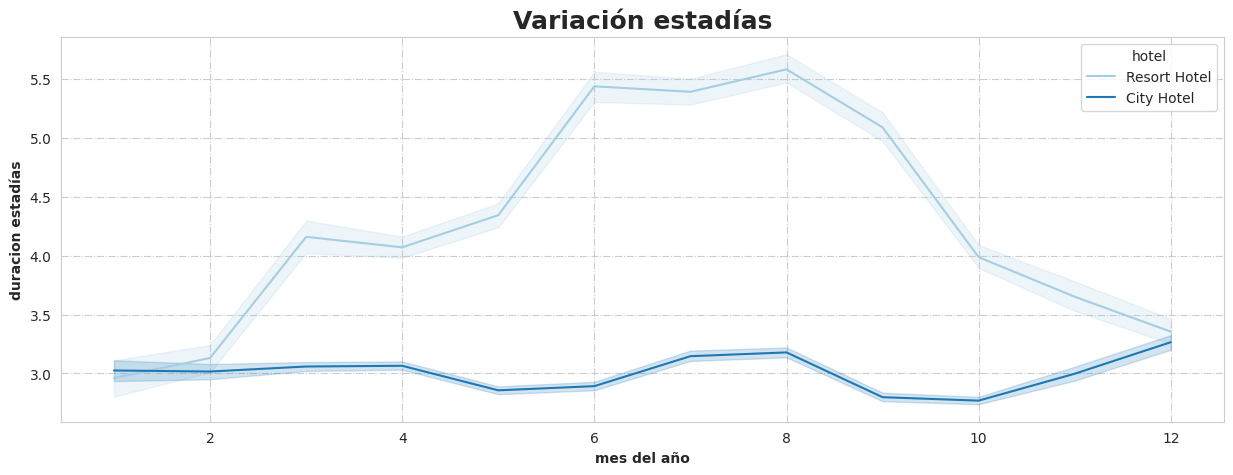

In [63]:
plt.subplots(figsize = (15,5))
sns.lineplot(data=df, x="arrival_date_month", y= "stays", hue="hotel", palette = sns.color_palette("Paired", 2))
plt.title("Variación estadías",fontweight = "bold", fontsize = 18)
plt.xlabel("mes del año",fontweight = "bold",fontsize = 10)
plt.ylabel("duracion estadías",fontweight = "bold",fontsize = 10)

En cuanto al tipo de clientes, en ambos hoteles, el mayor porcentaje corresponde al tipo Transient. Se entiende que son clientes que vacacionan de manera independiente normal, es decir sin un grupo ni un contrato predefinido.

Y el 90 % de las reservas son sólo de adultos en parejas por lo que se estima que son hoteles con un entorno poco familiar.

Text(0, 0.5, 'reservas')

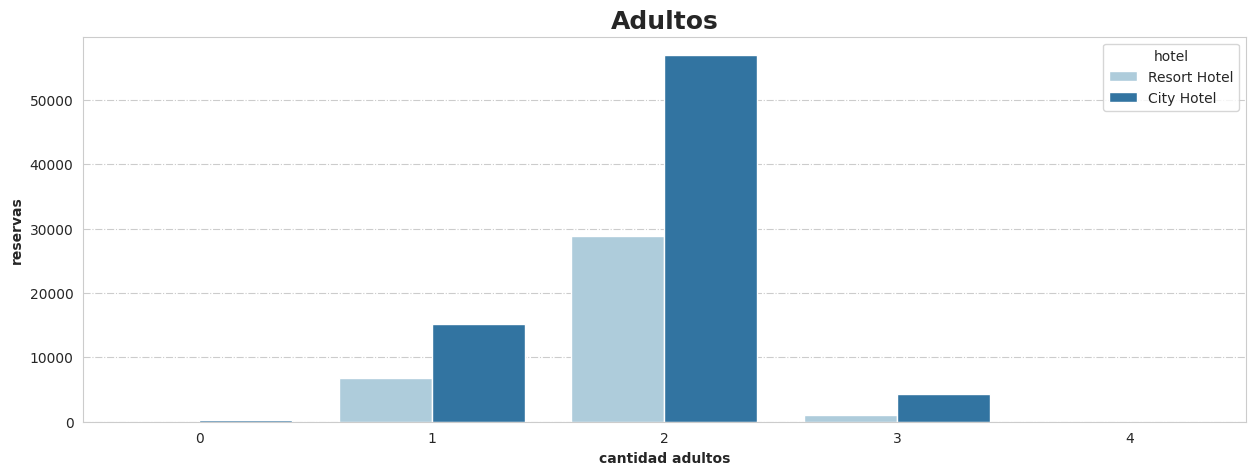

In [64]:
plt.subplots(figsize = (15,5))
sns.countplot(x="adults", data=df, hue= "hotel",palette = sns.color_palette("Paired", 2))
plt.title("Adultos",fontweight = "bold", fontsize = 18)
plt.xlabel("cantidad adultos",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

A su vez, el hotel posee una clientela mayormente internacional y se observó que el comportamiento de las cancelaciones cambia con respecto a las localidades internacionales.

Lo mismo ocurre con los viajes grupales.


Text(0, 0.5, 'reservas')

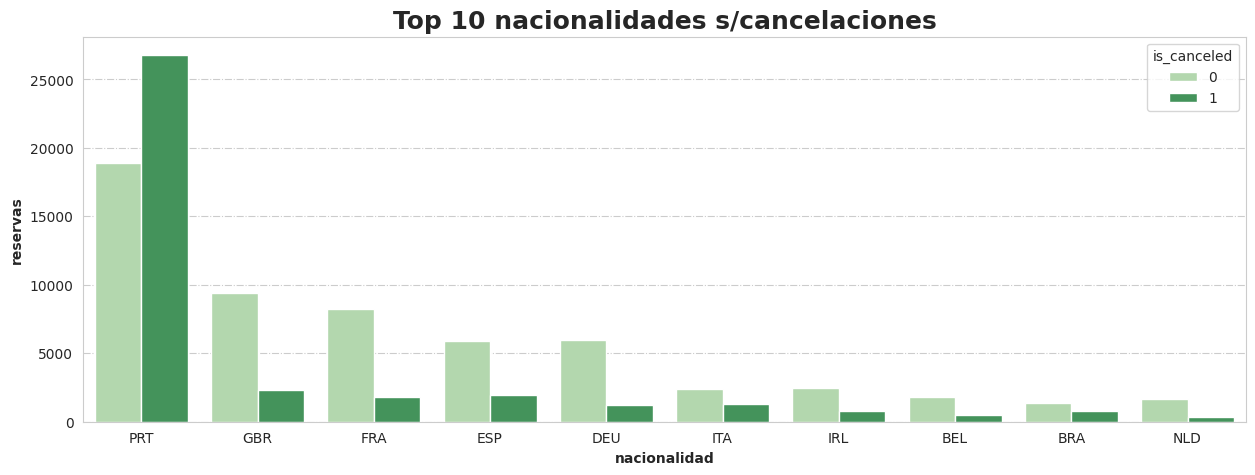

In [65]:
plt.subplots(figsize = (15,5))
sns.countplot(data=df, x="country",
              order=pd.value_counts(df['country']).iloc[:10].index, hue= "is_canceled",
              palette = sns.color_palette("Greens", 2))
plt.title("Top 10 nacionalidades s/cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("nacionalidad",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'reservas')

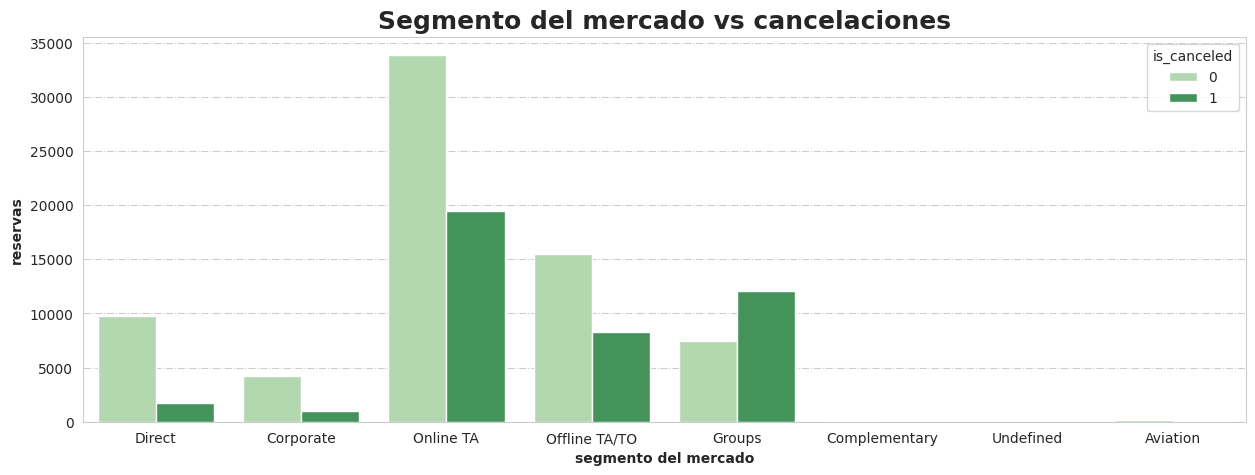

In [66]:
plt.subplots(figsize = (15,5))
sns.countplot(x="market_segment", data=df, hue= "is_canceled", palette = sns.color_palette("Greens", 2))
plt.title("Segmento del mercado vs cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("segmento del mercado",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Además, se infiere que si la reserva posee requerimientos especiales o pedido de lugares de cochera, el % de cancelaciones baja en relación al total.

Text(0, 0.5, 'reservas')

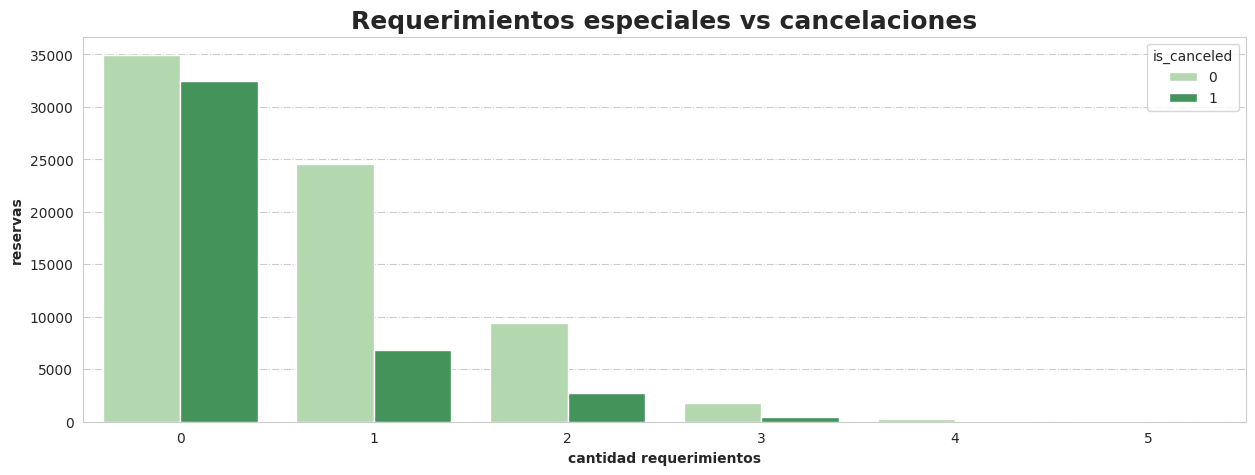

In [67]:
plt.subplots(figsize = (15,5))
sns.countplot(x="total_of_special_requests", data=df, hue= "is_canceled", palette = sns.color_palette("Greens", 2))
plt.title("Requerimientos especiales vs cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("cantidad requerimientos",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

El tiempo transcurrido entre la solicitud de la reserva y el arribo al hotel, demostro poseer una leve correlación lineal con las cancelaciones.

Text(0, 0.5, 'reservas')

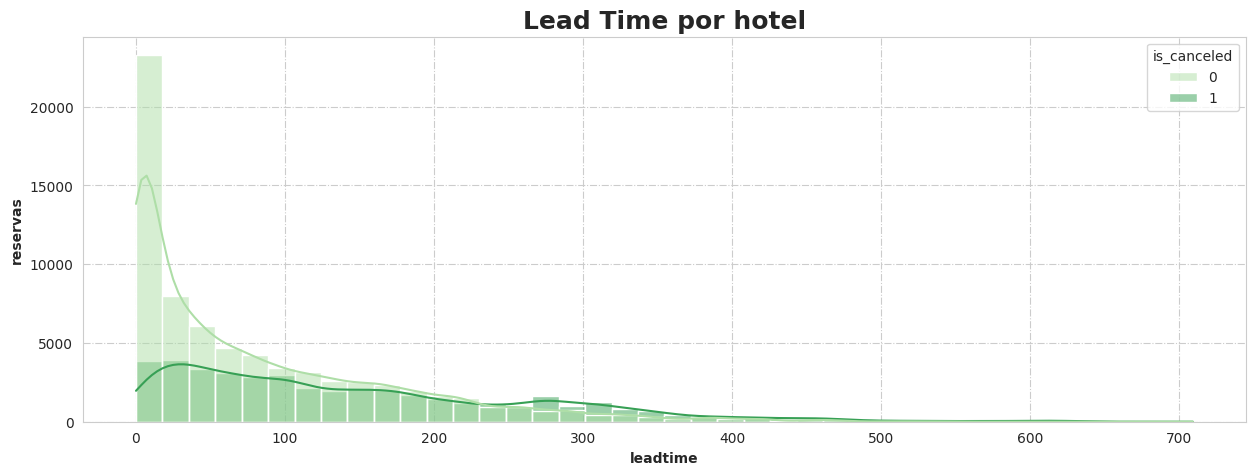

In [68]:
plt.subplots(figsize = (15,5))
sns.histplot(data = df, x = "lead_time", hue ="is_canceled", bins = 40, kde = True, palette = "Greens")
plt.title("Lead Time por hotel",fontweight = "bold", fontsize = 18)
plt.xlabel("leadtime",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

También se observo que la mayoria de las reservas corresponden a clientes nuevos y no repetidos.

[Text(0, 0, 'nuevo'), Text(1, 0, 'no nuevo')]

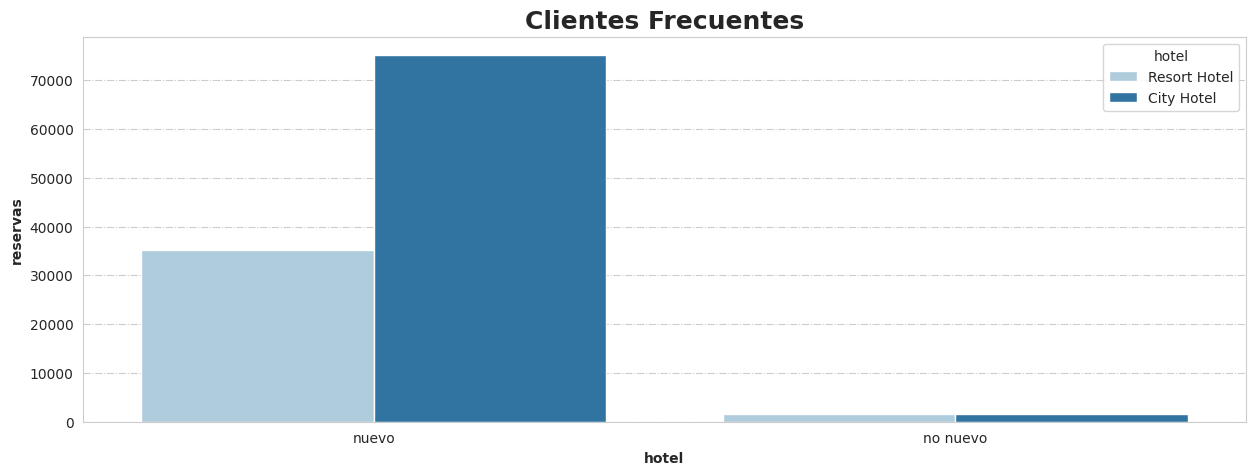

In [69]:
plt.subplots(figsize = (15,5))
g = sns.countplot (data =  df, x = "is_repeated_guest", hue = "hotel",palette = sns.color_palette("Paired", 2))
plt.title("Clientes Frecuentes",fontweight = "bold", fontsize = 18)
plt.xlabel("hotel",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)
g.set_xticklabels(["nuevo","no nuevo"])


El hotel tiene en general poca espera de la confirmación de la reserva y casi el 90 % de los casos se asigna la habitación que fue reservada por el cliente.

In [70]:
# verificación del tipo de habitacion reservada con la asignada
def crear_columna_nueva(row):
    if row["reserved_room_type"] == row["assigned_room_type"]:
        return "No hay cambio de habitacion reservada"
    return "Cambio de habitacion reservada"

comparacion = pd.DataFrame()

comparacion["result"] = df.apply(crear_columna_nueva, axis=1)

In [71]:
comparacion.value_counts(normalize = True)

result                               
No hay cambio de habitacion reservada    0.877777
Cambio de habitacion reservada           0.122223
dtype: float64

Las tarifas promedio varian según el tipo de hotel. En City hotel el promedio es de 100 usd mientras que en Resort hotel está en 50 usd.


Text(0, 0.5, 'monto')

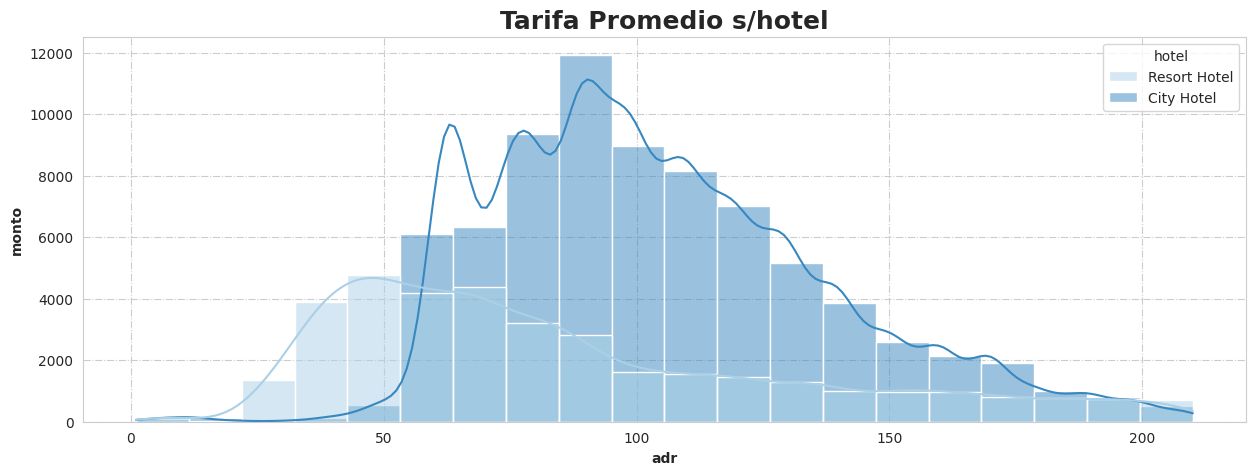

In [72]:
plt.subplots(figsize = (15,5))
sns.histplot(data = df, x = "adr", hue= "hotel", bins = 20, kde = True , palette = "Blues")
plt.title("Tarifa Promedio s/hotel",fontweight = "bold", fontsize = 18)
plt.xlabel("adr",fontweight = "bold",fontsize = 10)
plt.ylabel("monto",fontweight = "bold",fontsize = 10)

La habitacion más economica es la A y a su vez la más demandada, además posee muchos valores fuera del rango promedio pero eso se debe a los requerimientos especiales realizados sobre las mismas.

La habitación L es una de las más caras y posee un patron diferente con las cancelaciones, lo que infiere a que si el cliente paga más caro es probable que no anule la reserva.


Text(0, 0.5, 'adr')

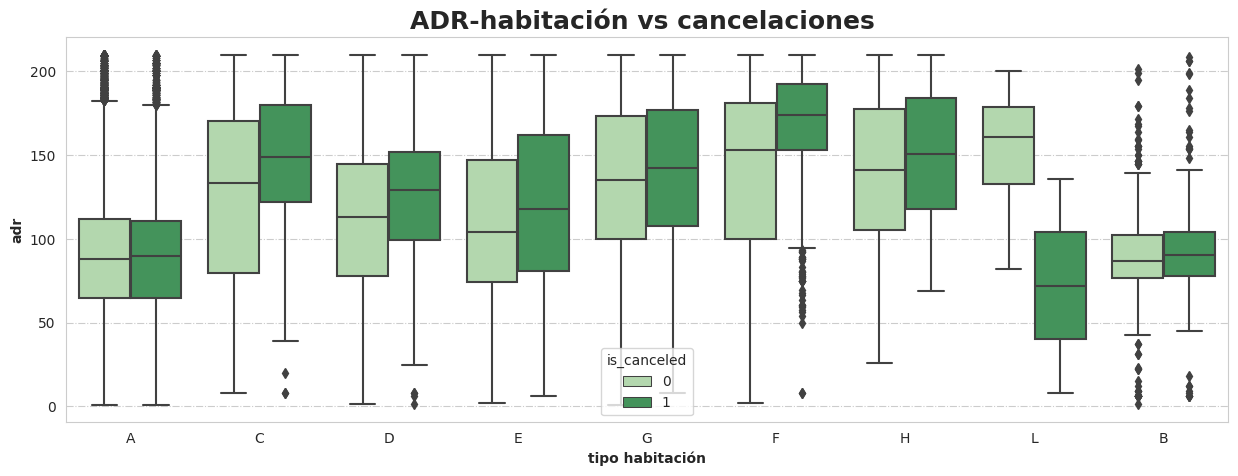

In [73]:
plt.subplots(figsize = (15,5))
sns.boxplot(data = df, x = "reserved_room_type", y = "adr", hue="is_canceled",
            palette = sns.color_palette("Greens", 2))
plt.title("ADR-habitación vs cancelaciones ",fontweight = "bold", fontsize = 18)
plt.xlabel("tipo habitación",fontweight = "bold",fontsize = 10)
plt.ylabel("adr",fontweight = "bold",fontsize = 10)

Según la forma de pago, cuando no es reembolsable la reserva existe un cambio en el patron de las reservas; siendo mayor el % de cancelaciones.

Text(0, 0.5, 'reservas')

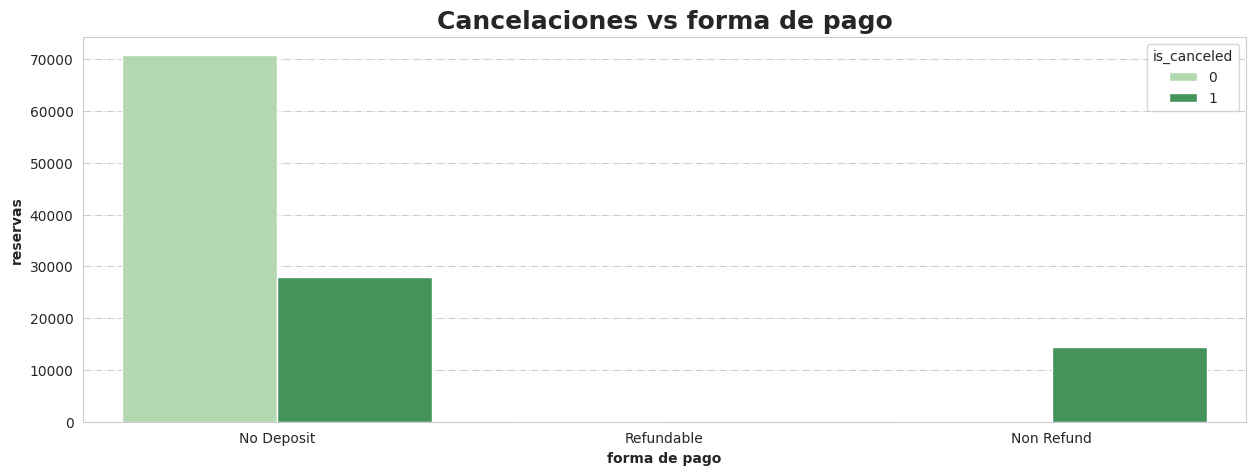

In [74]:
plt.subplots(figsize = (15,5))
sns.countplot(x="deposit_type", data=df, hue= "is_canceled",palette = sns.color_palette("Greens", 2))
plt.title("Cancelaciones vs forma de pago",fontweight = "bold", fontsize = 18)
plt.xlabel("forma de pago",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

**A partir de las principales conclusiones del EDA, se seleccionan las variables a considerar para el modelado.**

# **Feature Seleccion**

Se seleccionan todas las variables menos las que se indican a continuación, ya que a partir del EDA se asume que no aportan información:

*   arrival_date_XXX: sólo se deja arrival date month
*   stays_in_weekend_nights & stays_in_week_nights: se reemplaza con variable stays
*   children & babies: se reemplaza por variable Kids
*   country: se simplica la variable entre nacionales e internacionales
*   previous_cancellations & previous_bookings_not_canceled: no aportan información como se vió en el EDA
*   reserved_room_type: se reemplaza por assigned como se vió en el EDA
*   reservation_status & reservation_status_date: no aporta info


**Para la definición de los modelos, se tendrá en consideración el hecho que el set de datos no se encuentra balanceado: presenta un 40 % de cancelaciones y un 60 % de reservas efectivas.**

In [75]:
# generación de df para modelado
df_model = df.drop(columns =["arrival_date_year","arrival_date_week_number","arrival_date_day_of_month",
                              "stays_in_weekend_nights","stays_in_week_nights","children","babies",
                             "is_repeated_guest", "previous_cancellations","agent",
       "previous_bookings_not_canceled","reserved_room_type","reservation_status", "reservation_status_date"])

In [76]:
# simplificacion de variable country: nacional/internacional
df_model["country"]=df_model["country"].apply(lambda x: "National" if x=="PRT" else "International")

In [77]:
# se verifican duplicados en el nuevo df
df_model.duplicated().value_counts()

False    79645
True     33861
dtype: int64

In [78]:
# se eliminan duplicados
df_model = df_model.drop_duplicates()

In [79]:
# tamaño dataframe
df_model.shape

(79645, 18)

In [80]:
# información de las variables
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79645 entries, 2 to 119389
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        79645 non-null  object 
 1   is_canceled                  79645 non-null  int64  
 2   lead_time                    79645 non-null  int64  
 3   arrival_date_month           79645 non-null  int64  
 4   adults                       79645 non-null  int64  
 5   meal                         79645 non-null  object 
 6   country                      79645 non-null  object 
 7   market_segment               79645 non-null  object 
 8   distribution_channel         79645 non-null  object 
 9   assigned_room_type           79645 non-null  object 
 10  booking_changes              79645 non-null  int64  
 11  deposit_type                 79645 non-null  object 
 12  days_in_waiting_list         79645 non-null  int64  
 13  customer_type  

In [81]:
df_model.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'adults',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'stays'],
      dtype='object')

In [82]:
# variables numericas
num_col=[column for column in df_model.columns if (df_model[column].dtype=='int64') | (df_model[column].dtype=='float64')]
num_col

['is_canceled',
 'lead_time',
 'arrival_date_month',
 'adults',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'stays']

In [83]:
# variables categóricas
cat_col=[column for column in df_model.columns if (df_model[column].dtype=='object')]
cat_col

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

## **Variables Categoricas**
Se aplica un Label Encoded sobre todas las variables categoricas.

In [84]:
# importación libreria
from sklearn import preprocessing

In [85]:
le = preprocessing.LabelEncoder()

In [86]:
# label sobre variables categóricas
for feature in cat_col:
  df_model[feature] = le.fit_transform(df_model[feature])

## **Variables Numéricas**
Para las variables numericas, se verificaran las correlaciones y las distribuciones de las mismas para determinar cual método se usará: StandarScaler o MinMaxScaler

In [87]:
df_num = df_model[['is_canceled',
 'lead_time',
 'adults',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'stays']]

Text(0.5, 1.0, 'Correlacion entre variables')

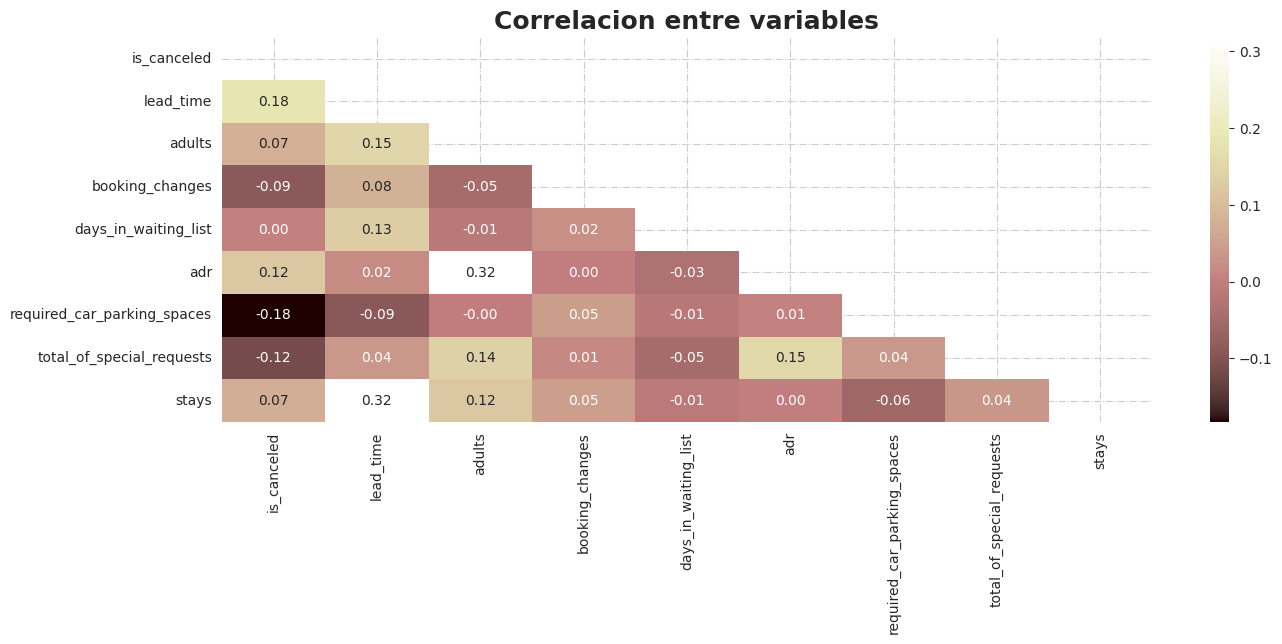

In [88]:
# correlacion con las cancelaciones
upp_mat2 = np.triu(df_num.corr())

plt.subplots(figsize = (15,5))

sns.heatmap(df_num.corr(),mask = upp_mat2 ,annot = True, fmt=".2f", cmap="pink")

plt.title("Correlacion entre variables", fontweight = "bold", fontsize = 18)

In [89]:
df_num.describe()

,is_canceled,lead_time,adults,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,stays
count,79645.000000,79645.000000,79645.000000,79645.000000,79645.000000,79645.000000,79645.000000,79645.000000,79645.000000
mean,0.275899,81.303133,1.875912,0.263118,0.740448,102.744929,0.083157,0.700898,3.673426
std,0.446969,86.128174,0.494592,0.701599,10.033506,41.121096,0.280138,0.826848,2.739222
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,12.000000,2.000000,0.000000,0.000000,73.290000,0.000000,0.000000,2.000000
50%,0.000000,51.000000,2.000000,0.000000,0.000000,97.540000,0.000000,1.000000,3.000000
75%,1.000000,127.000000,2.000000,0.000000,0.000000,130.000000,0.000000,1.000000,5.000000
max,1.000000,709.000000,4.000000,18.000000,391.000000,210.000000,8.000000,5.000000,69.000000


In [90]:
df_model.shape

(79645, 18)

**Se identifican pocas correlaciones lineales y en general las distribuciones de las variables no tienen un comportamiento normal; por ello se decide aplica MinMaxScaler**

El mismo se aplicará sobre todo el df_model, incluyendo las variables categóricas con su label.

In [91]:
# importacion de libreria
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
# entrenamiento y tranformación del df completo
model = scaler.fit_transform(df_model)

In [94]:
# re-generacion del df
model_ = pd.DataFrame(model)
model_.columns = df_model.columns

In [95]:
model_.head()

,hotel,is_canceled,lead_time,arrival_date_month,adults,meal,country,market_segment,distribution_channel,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,stays
0,1.0,0.0,0.009873,0.545455,0.25,0.00,0.0,0.428571,0.25,0.2,0.0,0.0,0.0,0.666667,0.354067,0.0,0.0,0.000000
1,1.0,0.0,0.018336,0.545455,0.25,0.00,0.0,0.285714,0.00,0.0,0.0,0.0,0.0,0.666667,0.354067,0.0,0.0,0.000000
2,1.0,0.0,0.019746,0.545455,0.50,0.00,0.0,0.857143,0.75,0.0,0.0,0.0,0.0,0.666667,0.464115,0.0,0.2,0.014706
3,1.0,0.0,0.000000,0.545455,0.50,0.00,1.0,0.428571,0.25,0.2,0.0,0.0,0.0,0.666667,0.507177,0.0,0.0,0.014706
4,1.0,0.0,0.012694,0.545455,0.50,0.25,1.0,0.428571,0.25,0.2,0.0,0.0,0.0,0.666667,0.488038,0.0,0.2,0.014706


Text(0.5, 1.0, 'Correlacion entre variables')

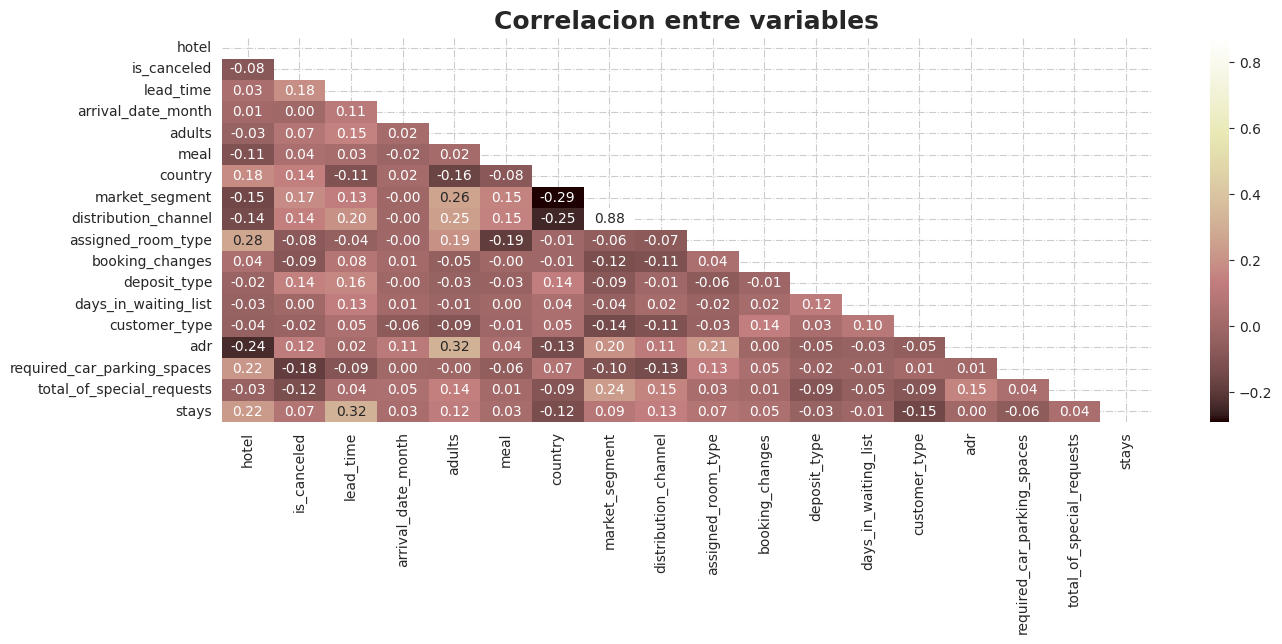

In [96]:
upp_mat3 = np.triu(model_.corr())

plt.subplots(figsize = (15,5))

sns.heatmap(model_.corr(),mask = upp_mat3 ,annot = True, fmt=".2f", cmap="pink")

plt.title("Correlacion entre variables", fontweight = "bold", fontsize = 18)

In [97]:
# verificacion de nulos
model_.isna().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_month             0
adults                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
assigned_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
stays                          0
dtype: int64

# **Aplicación de Modelos de ML de Clasificación**
Se aplicaron modelos de clasificacion supervisados para predecir la variable: is_canceled

In [98]:
# importación librerias
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Para evaluar el rendimiento de los modelos, se calcula el Accuracy, Precision, Recall y F1-Score; visualizando la Matriz de Confusión.**Con especial atención a la métrica de f1-score en las predicciones de la clase 1: Cancelaciones.**

In [99]:
#importación librerías
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [100]:
# función de rendimiento para los modelos
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    labels = ["Efectiva","Cancelada"]
    print("Classification Report (Test Set):")
    print(classification_report(ytest, pred, target_names=labels))
    print("")
    print("")
    plt.subplots(figsize = (2,2))
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.0%',cmap="Blues")
    plt.title("Matrix Confusión",fontweight = "bold", fontsize = 10)

## **Variables X & y**

In [101]:
# variables entrada X
X = model_.drop(columns="is_canceled")

In [102]:
# variable salida y: is_canceled
y = model_["is_canceled"]

In [103]:
# división de muestreos de entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## **Primer modelado ML**

Como se planteó al inicio del proyecto, el problema de negocio son las cancelaciones de las reservas. Por ello, el mejor modelo que resulte será aquel que pueda predecir la mayor cantidad de reservas que sean canceladas.

A partir de las métricas de los primeros modelos; se puso en evidencia el problema detectado en el EDA: **el set de datos no se encuentra balanceado**.

Por ello es que se descartó la métrica de accuracy como un valor analizable y se realizó el enfoque de los rendimientos a partir del f1-score considerando así el precision y recall en las predicciones de las cancelaciones.

Se probaron en total 6 modelos, en principio sin seteo de parámetros y luego apuntando a dar pesos equivalentes a las clases disponibles (utilizando el parámetro class weight en Decision Tree y Logistic Regression)

Los conclusiones principales son las siguientes:

* Decision Tree

Los modelos analizados poseen valores cercanos entre Precision y Recall a 60 %. Lo que indicaría que tiene un buen comportamiento en la prediccion de cancelaciones; pero es muy bajo el porcentaje en sí.


*  Logistic Regression

En estos modelos, se verificó como impacta el peso de las clases ya que en ambos modelos aparece una variacion evidente entre Precision y Recall. El modelo balanceado, aumenta ampliamente el recall pero baja la precision demostrando no ser el modelo mas adecuado ya que posee un porcentaje de Falsos Negativos muy alto.

*  KNN

En estos modelos, posee un comportamiento apto en ambos casos (n_nei = 5 y 10). El f1-score es de 60 % con mejor precision que recall. Lo cual indica que es un buen modelo ya que es menor el % de falsos negativos.

De los 6 modelos aplicados; se validaron unicamente los dos que demostraron un buen rendimiento:
1. Decision Tree Balanced
2. KNN n_nei = 10

## **Validación Simple**
A partir de la validación simple comparando métricas sobre train y test, se detectó que los dos modelos seleccionados anteriormente, estaban en **overfitting**.

Resumen comparando **accuracy**:
* Decision Tree : Train: 100 % y test: 76 %

Esto debe ser producto de que el árbol implementado no tiene una profundidad definida.

* KNN (vecinos:10): Train: 83 % y test: 79 %

Aqui es probable que el número de vecinos sea demasiado alto.








## **Validación Cruzada**
Se aplicó el método de cross validation con estratificación con la finalidad de estudiar a más detalle la precision de cada modelo y ver si es posible mejorarla, midiendo directamente el f1-score. Se iteró 5 veces el muestreo, indicando que las métricas se encontraban dentro de los margenes indicados al principio.

# **Mejora de Modelos de ML de Clasificación**

## **Optimización de Hiperparámetros**

Se aplicó GridCV Search sobre el modelo Decision Tree para localizar la profundidad óptima y en KNN para determinar el nro de vecinos; sin caer en overffiting.

A partir de dicho modelado, el más óptimo fue Decision Tree con una profundidad máxima de 7.

In [104]:
tree_7 = DecisionTreeClassifier(max_depth = 7, class_weight = "balanced")

In [105]:
tree_7.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7)

In [106]:
predicciones_tree = tree_7.predict(X_test)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Efectiva       0.88      0.79      0.83     17274
   Cancelada       0.57      0.71      0.63      6620

    accuracy                           0.77     23894
   macro avg       0.72      0.75      0.73     23894
weighted avg       0.79      0.77      0.78     23894





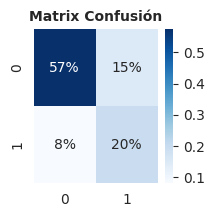

In [107]:
eval_classification(tree_7, predicciones_tree, X_train, y_train, X_test, y_test)

El f1-score obtenido es de 63 %. **A pesar de ser la mejor métrica obtenida hasta el momento, sigue siendo baja; además se obtiene un recall más alto que la precision ponderando los Falsos Negativos en la predicción.**

## **Modelos de Ensamble con Optimizacion de Hiperparámetros**
Con el objetivo de mejorar aún más el rednimiento del modelo obtenido; se aplicará un modelo de ensamble con varios decision trees mediante Random Forest.

Se aplicó Grid Search para detectar hiperparámetros óptimos, a traves de la métrica f1-score.

In [108]:
# importacion del modelo
from sklearn.ensemble import RandomForestClassifier

In [109]:
# seleccion de parámetros
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_depth = range(3,9,2)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [110]:
# diccionario de parámetros
rf_parametros = {'n_estimators': n_estimators,'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [111]:
# modelo Random Forest
rf = RandomForestClassifier(class_weight = "balanced")

In [113]:
# importacion de libreria
from sklearn.model_selection import StratifiedKFold

In [115]:
# definicion de la iteracion en 5
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [118]:
# importacion de libreria
from sklearn.model_selection import GridSearchCV

In [119]:
# modelo con búsqueda de parámetros
rf_Grid = GridSearchCV(estimator = rf, param_grid = rf_parametros, scoring = "f1",
                       cv = stratified_kfold , verbose=2, n_jobs = 4)

In [120]:
# entrenamiento
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': range(3, 9, 2),
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             scoring='f1', verbose=2)

In [121]:
# mejores parámetros para random forest
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 33}

In [122]:
rf_best = RandomForestClassifier(bootstrap = True, max_depth = 7, min_samples_leaf = 2,
                                 min_samples_split = 2, n_estimators = 56)

In [123]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=56)

In [124]:
y_pred_rf_best = rf_best.predict(X_test)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Efectiva       0.81      0.94      0.87     17274
   Cancelada       0.73      0.41      0.53      6620

    accuracy                           0.80     23894
   macro avg       0.77      0.68      0.70     23894
weighted avg       0.79      0.80      0.77     23894





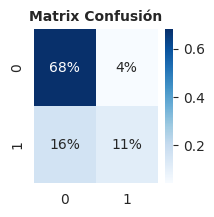

In [125]:
eval_classification(rf_best, y_pred_rf_best, X_train, y_train, X_test, y_test)

# **Conclusiones finales**

A partir del analisis de hiperparámetros y aplicación
de modelos de ensamble; se concluye que el mejor modelo es un Random Forest con 56 árboles de decision como estimadores.
Como acurracy general indica 80 % lo cual es una métrica adecuada. A su vez, se analizó que en un modelo que no cae en overffiting.

Si es importante recalcar que no es un modelo de presente alta precision a la hora de detectar que reservas son canceladas; con una precision de 73 % y un recall de 44 % indica que si bien predice con un buen desempeño aquellas reservas canceladas; hay un porcentaje considerable de reservas que serán canceladas y que escapan de la dectección del modelo.
Las causas de este comportamiento son a raiz del desbalance que se posee en los datos originales.

Si bien el modelo anterior: Decision Tree (max_depth = 7) indica un f1-score más elevado; tiene un porcetaje muy alto de recall lo cual puede ser perjudicial ya que existe un mayor el % de falsos negativos en el modelo; es decir reservas predichas como cancelaciones que son efectivas en realidad.

Como soluciones para mejora, se plantea:
*   Aplicar al modelo existente planteado, mayor peso a la clase 1: reservas canceladas.
*   Aumentar el volumen de datos con el fin de minizar el desbalance de los mismos.